In [1]:
import sys
import os
sys.path.append(os.path.abspath("/data2/eranario/scratch/rgb-to-multispectral-unet"))

In [2]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

from src.dataset import PotatoDataset
from torch.utils.data import DataLoader
from PIL import Image

In [3]:
rgb_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images"
spectral_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images"

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [5]:
dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, align=True)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

Loading train data: 100%|██████████| 240/240 [01:46<00:00,  2.26it/s]


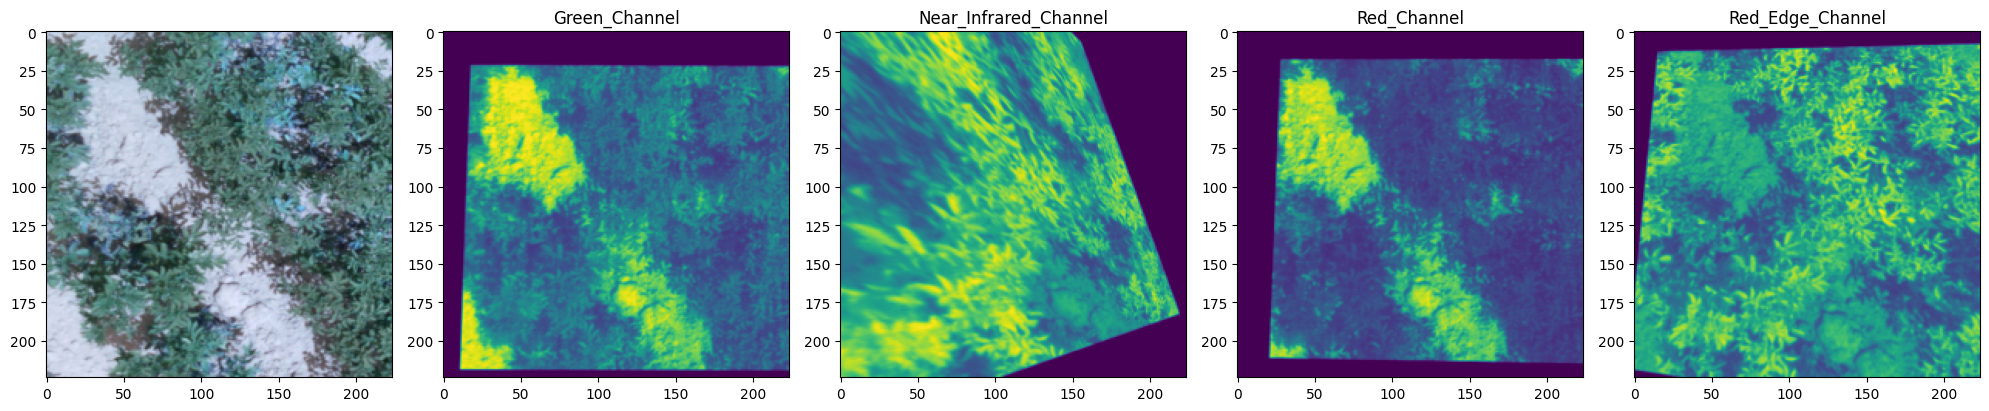

In [6]:
def show_images(images, titles=None):
    """
    Display a row of images with optional titles.

    Args:
        images: List of images to display.
        titles: List of titles corresponding to each image. (Optional)
    """
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))  # Display all images in a row
    
    for i, image in enumerate(images):
        # If the image is a tensor, convert to PIL
        if not isinstance(image, Image.Image):
            image = F.to_pil_image(image[0])
        
        # Plot the image
        axes[i].imshow(image)
        # axes[i].axis('off')

    for i, title in enumerate(titles):
        axes[i+1].set_title(title)
        
    plt.tight_layout()
    plt.show()

for images in dataloader:
    # just show first image in batch
    show_images(images, titles=dataset.channels)
    break 

In [7]:
%matplotlib notebook

In [8]:
import matplotlib.animation as animation

def animate_images(images):
    """
    Animate images to check alignment via blinking effect.
    """
    fig = plt.figure()
    ims = []
    for image in images:
        image = F.to_pil_image(image[0])  # Convert to PIL image
        im = plt.imshow(image, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=2000)
    
    # Use HTML representation for Jupyter Notebook
    from IPython.display import HTML
    return HTML(ani.to_jshtml())

# Usage
for images in dataloader:
    display(animate_images(images))
    break

<IPython.core.display.Javascript object>